In [39]:
import mlc_func as mlcf
import numpy as np
from ase.io import read
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [263]:
dN = 5
N_equib = 8000
N_max = -1

path = '../../trajectories/pbe_to_mbp_16_seawulf/pbe_to_mbp_16.traj'
# path = '../../trajectories/mbpol.traj'
# path = '../../trajectories/pbe/pbe.traj'
# path = '../../trajectories/revpbe/revpbe.traj'
path = '../../trajectories/revPBE_PBE/nn/revpbe_to_pbe_hexemb/revpbe_to_pbe_mb.traj'

In [264]:
len(read(path, '::100'))*100/2000

16.0

In [265]:
if N_max == -1:
    trajectory = read(path, '{}::{}'.format(N_equib,dN))
else:
    trajectory = read(path, '{}:{}:{}'.format(N_equib,N_max,dN))
    
positions = []
for t in trajectory:
    positions.append(t[::3].get_positions()  - t[::3].get_center_of_mass())
    
mean_displacement = []
for p in positions:
    mean_displacement.append(np.mean(np.linalg.norm(p-positions[0], axis = -1)**2))

t = np.arange(0,len(positions))/2000*dN

In [266]:
def lin(x, a, b):
    return a*x + b 

In [267]:
t_min = 1

start_fit = int(t_min*2000/dN)

In [268]:
opt = curve_fit(lin, t[start_fit:], np.array(mean_displacement)[start_fit:])

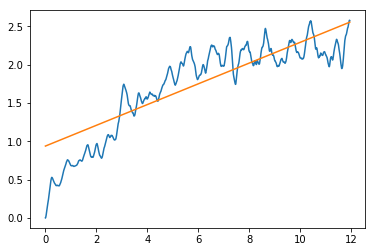

In [269]:
plot(t,mean_displacement)
plot(t, lin(t,*opt[0]))

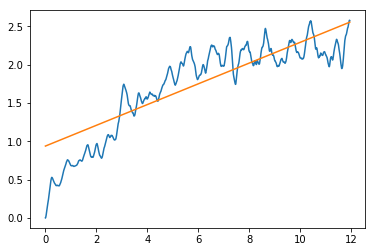

In [271]:
plot(t,mean_displacement)
plot(t, lin(t,*opt[0]))

In [272]:
opt[0]/6

array([0.02256373, 0.15640943])